<div><h2><b><center>MANOJ KUMAR - 2048015</b></h2></div>
<div><h3><b><center>Lab 7 & 8 - Chronic Kidney Disease</b></h3></div>

**To experimenting with Support Vector Machine. Implement both SVC and SVR to perform classification and regression task on your assigned domain. Check the impact of learning rate and kernels on the model's performance**

###### Importing basic libraries

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

###### Reading the dataset

In [2]:
ckd_df = pd.read_csv('kidney_disease.csv')

#Check the shape
print(ckd_df.shape)

(400, 26)


In [3]:
#check the columns
ckd_df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

###### Rename the columns to have meaningful names

In [4]:
col_dict={"bp":"blood_pressure",
          "sg":"specific_gravity",
          "al":"albumin",
          "su":"sugar",
          "rbc":"red_blood_cells",
          "pc":"pus_cell",
          "pcc":"pus_cell_clumps",
          "ba":"bacteria",
          "bgr":"blood_glucose_random",
          "bu":"blood_urea",
          "sc":"serum_creatinine",
          "sod":"sodium",
          "pot":"potassium",
          "hemo":"hemoglobin",
          "pcv":"packed_cell_volume",
          "wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count",
          "htn":"hypertension",
          "dm":"diabetes_mellitus",
          "cad":"coronary_artery_disease",
          "appet":"appetite",
          "pe":"pedal_edema",
          "ane":"anemia"}

ckd_df.rename(columns=col_dict, inplace=True)

#Check the column names again
ckd_df.columns

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'classification'],
      dtype='object')

###### Observing the data

In [5]:
ckd_df.head(11).T

,0,1,2,3,4,5,6,7,8,9,10
id,0,1,2,3,4,5,6,7,8,9,10
age,48,7,62,48,51,60,68,24,52,53,50
blood_pressure,80,50,80,70,80,90,70,NaN,100,90,60
specific_gravity,1.02,1.02,1.01,1.005,1.01,1.015,1.01,1.015,1.015,1.02,1.01
albumin,1,4,2,4,2,3,0,2,3,2,2
sugar,0,0,3,0,0,0,0,4,0,0,4
red_blood_cells,NaN,NaN,normal,normal,normal,NaN,NaN,normal,normal,abnormal,NaN
pus_cell,normal,normal,normal,abnormal,normal,NaN,normal,abnormal,abnormal,abnormal,abnormal
pus_cell_clumps,notpresent,notpresent,notpresent,present,notpresent,notpresent,notpresent,notpresent,present,present,present
bacteria,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent


##### Data DeepDive

In [6]:
for i in ckd_df.drop("id",axis=1).columns:
    print('unique values in "{}":\n'.format(i),ckd_df[i].unique())

unique values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in "blood_pressure":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in "specific_gravity":
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in "albumin":
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in "sugar":
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in "red_blood_cells":
 [nan 'normal' 'abnormal']
unique values in "pus_cell":
 ['normal' 'abnormal' nan]
unique values in "pus_cell_clumps":
 ['notpresent' 'present' nan]
unique values in "bacteria":
 ['notpresent' 'present' nan]
unique values in "blood_glucose_random":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114

In [7]:
#Replace incorrect values
ckd_df['diabetes_mellitus'] =ckd_df['diabetes_mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
ckd_df['coronary_artery_disease'] = ckd_df['coronary_artery_disease'].replace(to_replace='\tno',value='no')
ckd_df['white_blood_cell_count'] = ckd_df['white_blood_cell_count'].replace(to_replace='\t8400',value='8400')
ckd_df["classification"]=ckd_df["classification"].replace("ckd\t", "ckd")

for i in range(ckd_df.shape[0]):
    if ckd_df.iloc[i,16]=='\t?':
        ckd_df.iloc[i,16]=np.nan
    if ckd_df.iloc[i,16]=='\t43':
        ckd_df.iloc[i,16]='43'
    if ckd_df.iloc[i,17]=='\t?':
        ckd_df.iloc[i,17]=np.nan
    if ckd_df.iloc[i,17]=='\t6200':
        ckd_df.iloc[i,17]= '6200'
    if ckd_df.iloc[i,18]=='\t?':
        ckd_df.iloc[i,18]=np.nan
    if ckd_df.iloc[i,25]=='ckd':
        ckd_df.iloc[i,25]='1'
    if ckd_df.iloc[i,25]=='notckd':
        ckd_df.iloc[i,25]='0'

for i in ckd_df.drop("id",axis=1).columns:
    print('unique values in "{}":\n'.format(i),ckd_df[i].unique())

unique values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in "blood_pressure":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in "specific_gravity":
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in "albumin":
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in "sugar":
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in "red_blood_cells":
 [nan 'normal' 'abnormal']
unique values in "pus_cell":
 ['normal' 'abnormal' nan]
unique values in "pus_cell_clumps":
 ['notpresent' 'present' nan]
unique values in "bacteria":
 ['notpresent' 'present' nan]
unique values in "blood_glucose_random":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114

In [8]:
# Observing the summarized information of data
ckd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [9]:
ckd_df.iloc[:,-1]=ckd_df.iloc[:,-1].astype('int64')
ckd_df.head(11).T

,0,1,2,3,4,5,6,7,8,9,10
id,0,1,2,3,4,5,6,7,8,9,10
age,48,7,62,48,51,60,68,24,52,53,50
blood_pressure,80,50,80,70,80,90,70,NaN,100,90,60
specific_gravity,1.02,1.02,1.01,1.005,1.01,1.015,1.01,1.015,1.015,1.02,1.01
albumin,1,4,2,4,2,3,0,2,3,2,2
sugar,0,0,3,0,0,0,0,4,0,0,4
red_blood_cells,NaN,NaN,normal,normal,normal,NaN,NaN,normal,normal,abnormal,NaN
pus_cell,normal,normal,normal,abnormal,normal,NaN,normal,abnormal,abnormal,abnormal,abnormal
pus_cell_clumps,notpresent,notpresent,notpresent,present,notpresent,notpresent,notpresent,notpresent,present,present,present
bacteria,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent


In [10]:
print(ckd_df['packed_cell_volume'].unique())
print(ckd_df['white_blood_cell_count'].unique())
print(ckd_df['red_blood_cell_count'].unique())

['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '52' '14' '22' '18' '42' '17' '46' '23' '19'
 '25' '41' '26' '15' '21' '43' '20' '47' '9' '49' '50' '53' '51' '54']
['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '7100' '11800' '9400' '5500' '5800' '13200'
 '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800' '6500'
 '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300' '12400'
 '10500' '4200' '4700' '10900' '8100' '9500' '2200' '12800' '11200'
 '19100' '12300' '16700' '2600' '26400' '8800' '7400' '4900' '8000'
 '12000' '15700' '4100' '5700' '11500' '5400' '10800' '9900' '5200' '5900'
 '9300' '9700' '5100' '6600']
['5.2' nan '3.9' '4.6' '4.4' '5' '4.0' '3.7' '3.8' '3.4' '2.6' '2.8' '4.3'
 '3.2' '3.6' '4' '4.1' '4.9' '2.5' '

In [11]:
mistyped=['packed_cell_volume','white_blood_cell_count','red_blood_cell_count']
for col in mistyped:
        ckd_df[col]=ckd_df[col].astype('float')
                
numeric=[]
for i in ckd_df.columns:
    if ckd_df[i].dtype=='float64':
        numeric.append(i)

numeric 

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'hemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [12]:
ckd_df.drop('id',axis=1,inplace=True)

categoricals=[]

for col in ckd_df.columns:
    if not col in numeric:
        categoricals.append(col)
categoricals.remove('classification')

categoricals

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'pedal_edema',
 'anemia']

In [13]:
import warnings
warnings.simplefilter('ignore')

import matplotlib.style as style
style.use('fivethirtyeight')

##### Checking distribution of the numerical features

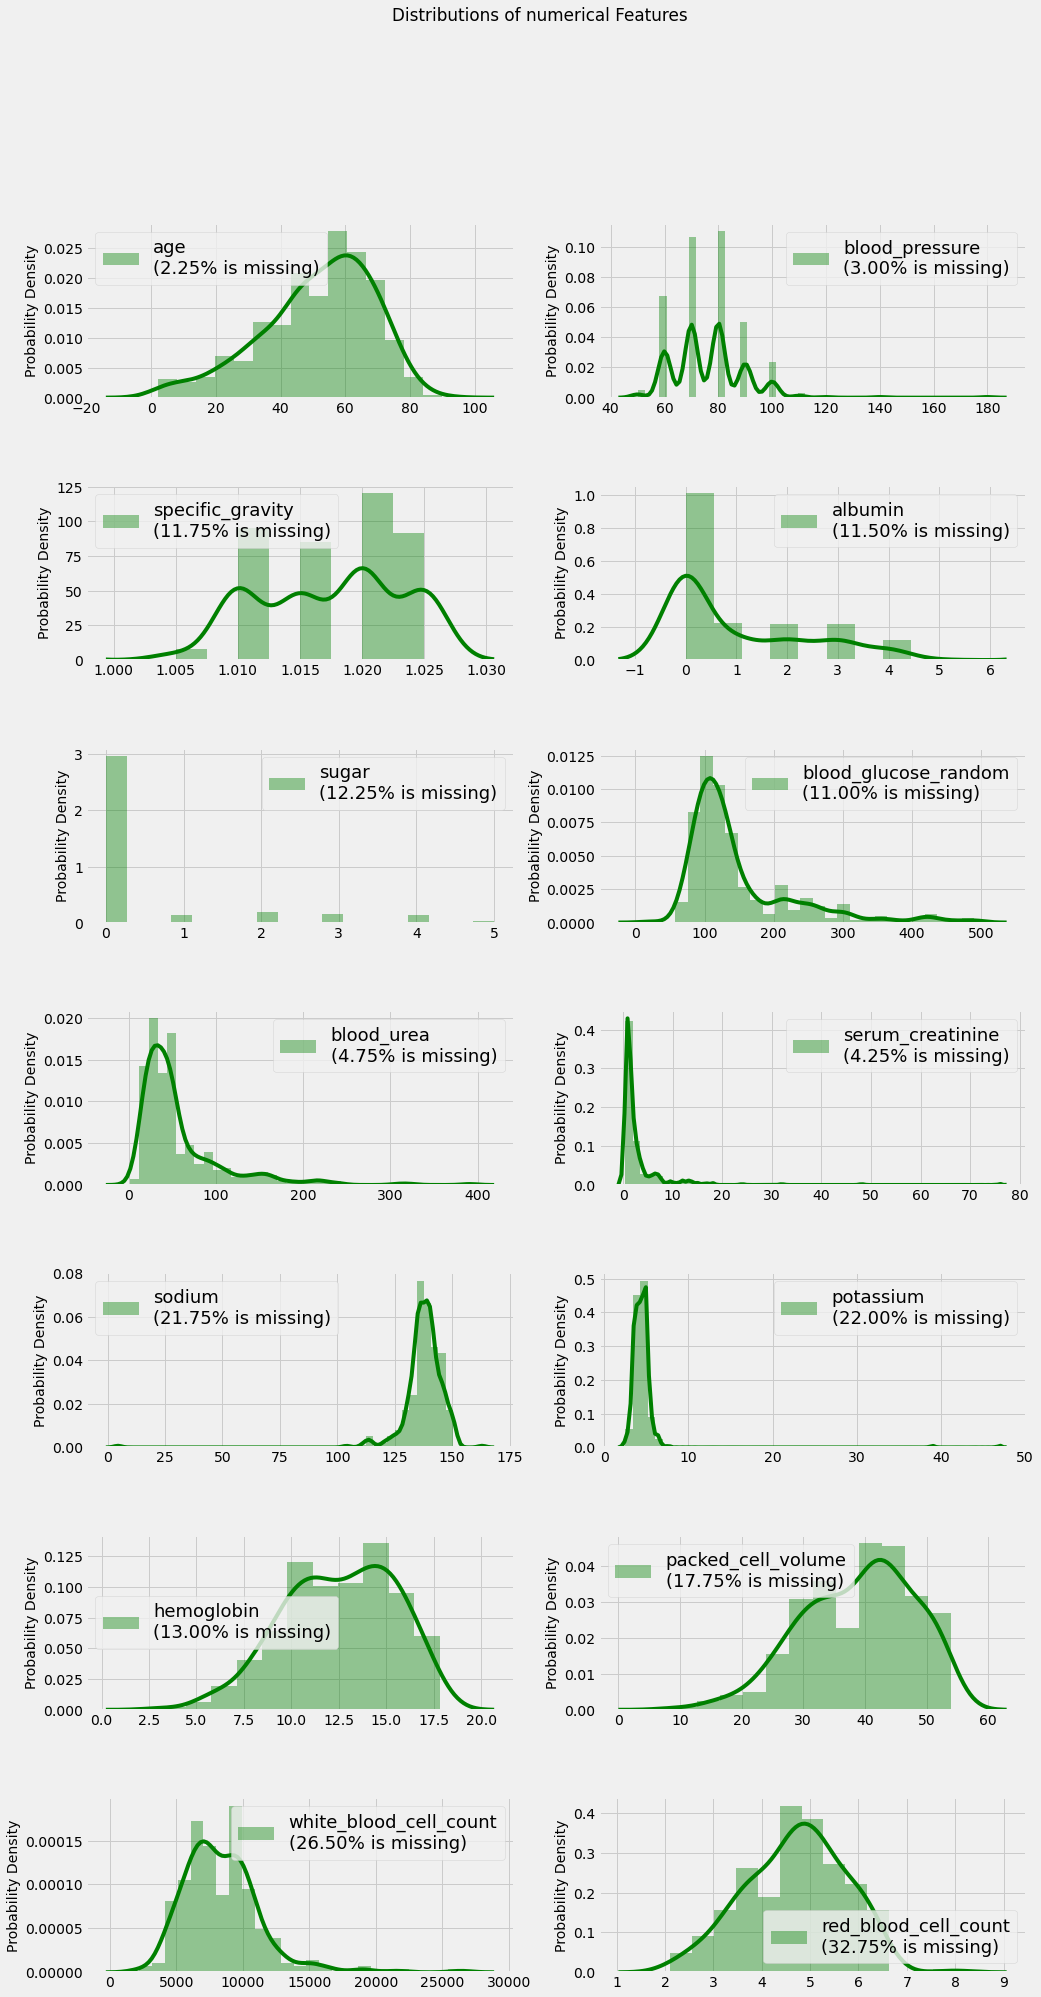

In [14]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15,30))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of numerical Features')

n_rows, n_cols = (7,2)

for index, column in enumerate(numeric):
    
    i,j = (index // n_cols), (index % n_cols)
    miss_perc="%.2f"%(100*(1-(ckd_df[column].dropna().shape[0])/ckd_df.shape[0]))
    collabel=column+"\n({}% is missing)".format(miss_perc)
    fig=sns.distplot(ckd_df[column], color="green", label=collabel, 
                     norm_hist=True, ax=axes[i,j], kde_kws={"lw":4})
    fig=fig.legend(loc='best', fontsize=18)
    
    axes[i,j].set_ylabel("Probability Density",fontsize='medium')
    axes[i,j].set_xlabel(None)

plt.show()

##### Checking distribution of the Categorical features

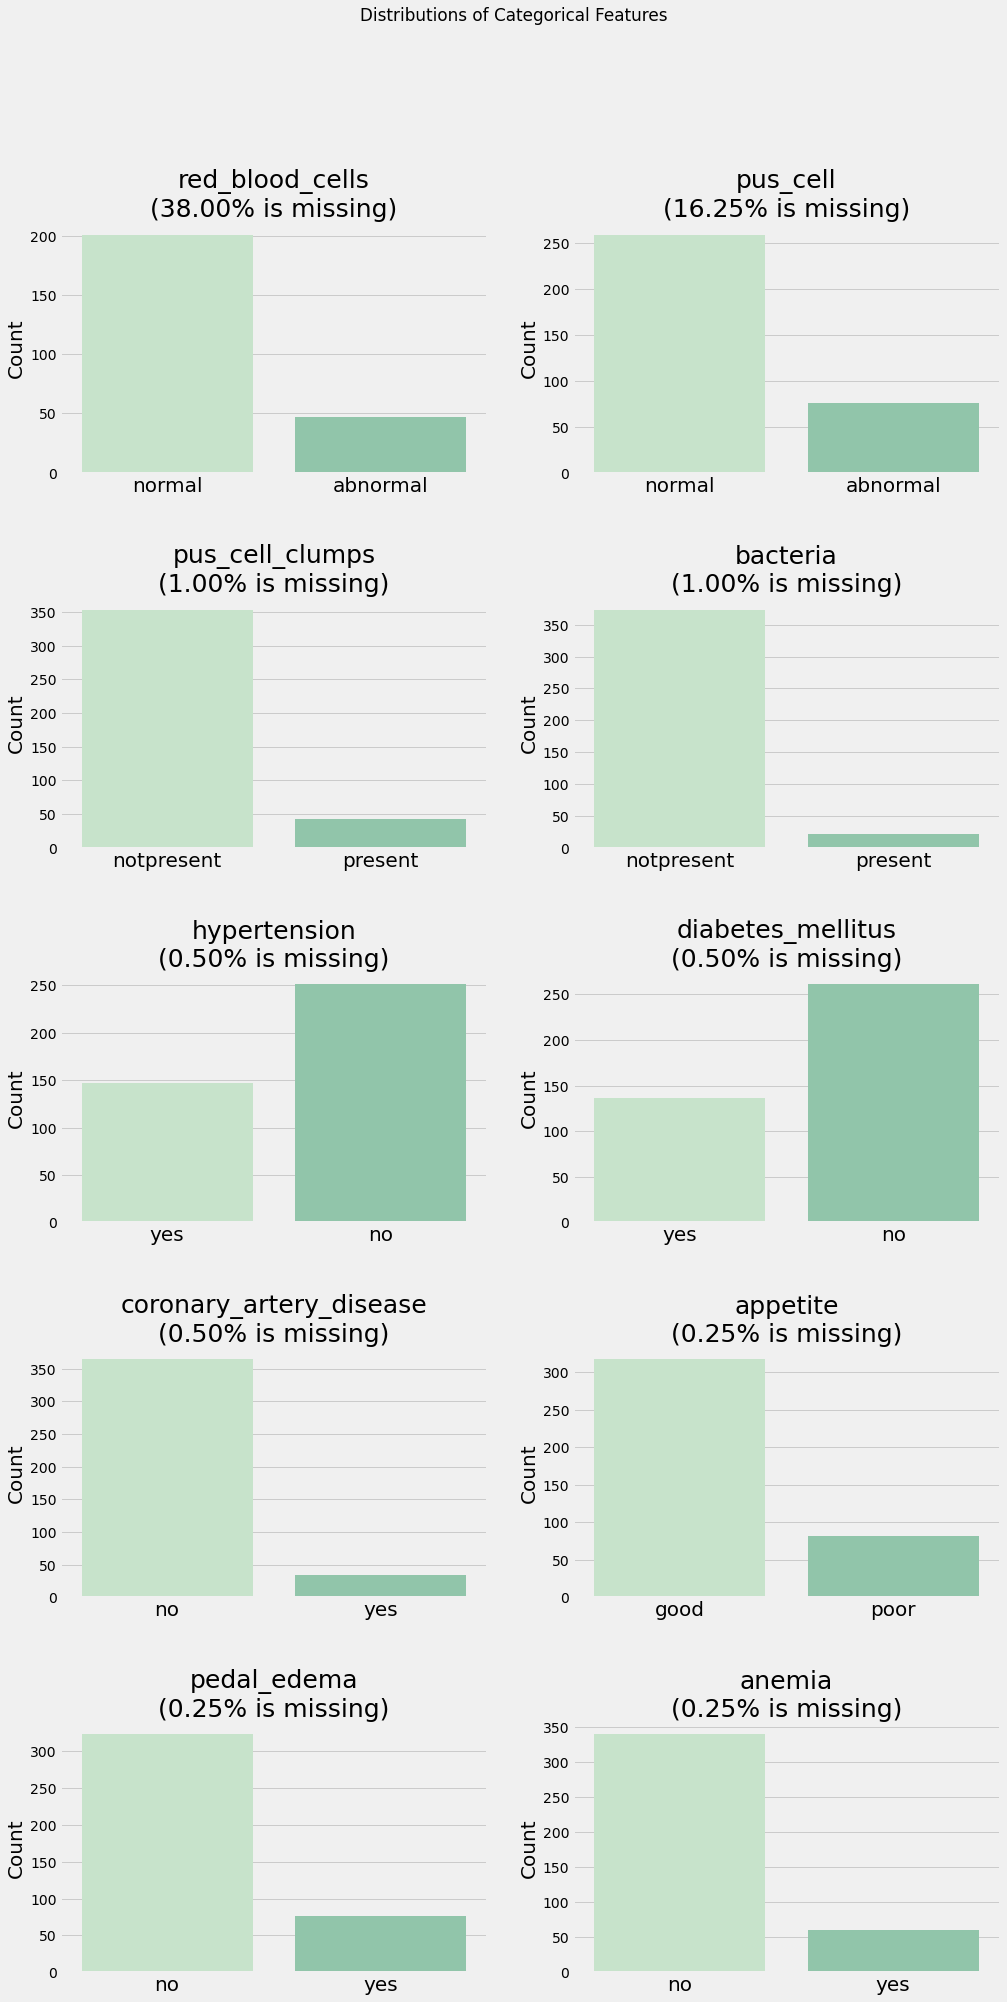

In [15]:
style.use('fivethirtyeight')

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,30))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of Categorical Features')

n_rows, n_cols = (5,2)

for index, column in enumerate(categoricals):
    
    i,j = index // n_cols, index % n_cols
    miss_perc="%.2f"%(100*(1-(ckd_df[column].dropna().shape[0])/ckd_df.shape[0]))
    collabel=column+"\n({}% is missing)".format(miss_perc)
    fig = sns.countplot(x=column, data=ckd_df,label=collabel, 
                        palette=sns.cubehelix_palette(rot=-.4,light=0.85,hue=1), ax=axes[i,j])
    
    axes[i,j].set_title(collabel,fontsize=25)
    axes[i,j].set_xlabel(None)
    axes[i,j].set_ylabel("Count",fontsize=20)
    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(), Fontsize=20)

plt.show()

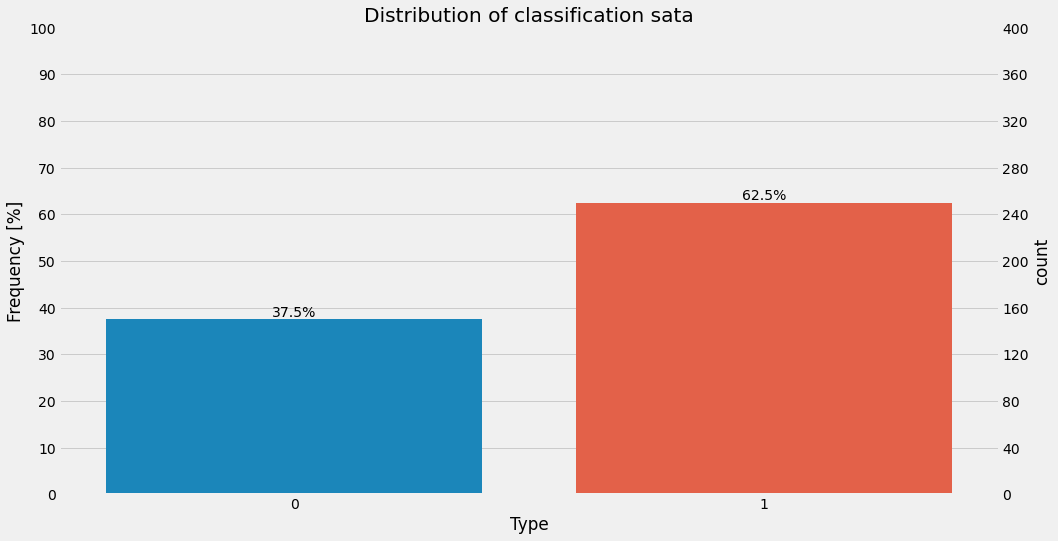

In [16]:
import matplotlib.ticker as ticker
style.use('fivethirtyeight')
# Some random data
ncount = 400

plt.figure(figsize=(15,8))
ax = sns.countplot(x="classification", data=ckd_df)
plt.title('Distribution of classification sata')
plt.xlabel('Type')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

In [17]:
for i in range(ckd_df.shape[0]):
    if ckd_df.iloc[i,24]=='ckd':
        ckd_df.iloc[i,24]='1'
    if ckd_df.iloc[i,24]=='notckd':
        ckd_df.iloc[i,24]='0'

##### Missing Values

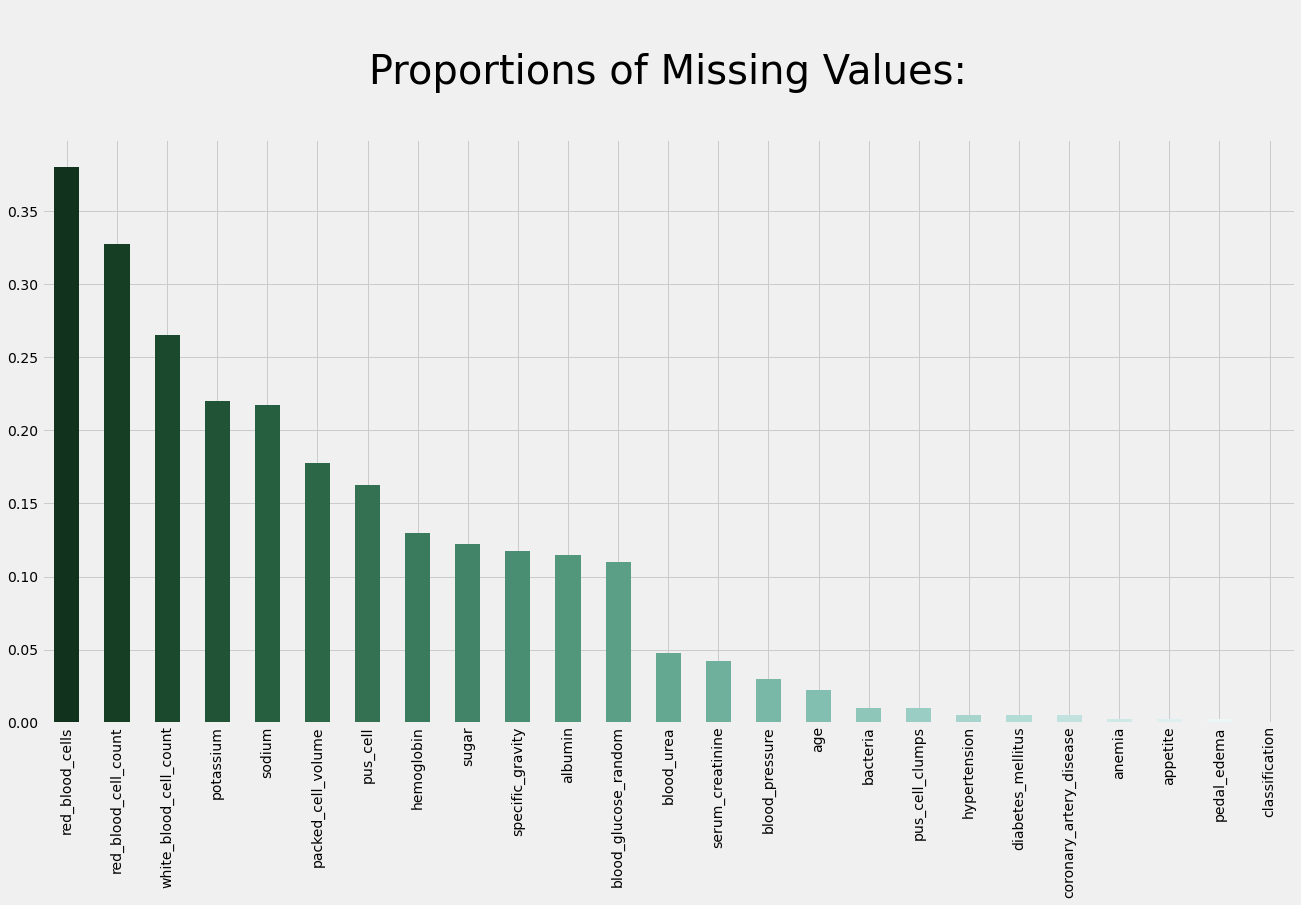

In [18]:
style.use('fivethirtyeight')

d=((ckd_df.isnull().sum()/ckd_df.shape[0])).sort_values(ascending=False)
d.plot(kind='bar',
       color=sns.cubehelix_palette(start=2,
                                    rot=0.15,
                                    dark=0.15,
                                    light=0.95,
                                    reverse=True,
                                    n_colors=24),
        figsize=(20,10))
plt.title("\nProportions of Missing Values:\n",fontsize=40)
plt.show()

##### One-Hot Encoding

In [19]:
onehotdata=pd.get_dummies(ckd_df,drop_first=True,prefix_sep=': ')

In [20]:
# define imputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
impute_columns=list(set(onehotdata.columns)-set(["classification"]))
print(impute_columns)

['appetite: poor', 'hemoglobin', 'serum_creatinine', 'albumin', 'sugar', 'blood_pressure', 'hypertension: yes', 'potassium', 'packed_cell_volume', 'coronary_artery_disease: yes', 'red_blood_cells: normal', 'specific_gravity', 'red_blood_cell_count', 'sodium', 'pus_cell_clumps: present', 'white_blood_cell_count', 'anemia: yes', 'bacteria: present', 'pus_cell: normal', 'blood_urea', 'diabetes_mellitus: yes', 'pedal_edema: yes', 'blood_glucose_random', 'age']


In [21]:
imputer.fit(onehotdata[impute_columns])     

KNNImputer()

In [22]:
X_trans=pd.DataFrame(imputer.transform(onehotdata[impute_columns]), columns=impute_columns)

In [23]:
X_trans.head(13).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
appetite: poor,0.00,0.00,1.00,1.000,0.00,0.000,0.00,0.000,0.000,1.00,0.00,1.00,1.000
hemoglobin,15.40,11.30,9.60,11.200,11.60,12.200,12.40,12.400,10.800,9.50,9.40,10.80,9.700
serum_creatinine,1.20,0.80,1.80,3.800,1.40,1.100,24.00,1.100,1.900,7.20,4.00,2.70,2.100
albumin,1.00,4.00,2.00,4.000,2.00,3.000,0.00,2.000,3.000,2.00,2.00,3.00,3.000
sugar,0.00,0.00,3.00,0.000,0.00,0.000,0.00,4.000,0.000,0.00,4.00,0.00,1.000
blood_pressure,80.00,50.00,80.00,70.000,80.00,90.000,70.00,74.000,100.000,90.00,60.00,70.00,70.000
hypertension: yes,1.00,0.00,0.00,1.000,0.00,1.000,0.00,0.000,1.000,1.00,1.00,1.00,1.000
potassium,4.20,3.92,4.20,2.500,3.98,3.200,4.00,4.200,4.960,3.70,4.56,4.20,5.800
packed_cell_volume,44.00,38.00,31.00,32.000,35.00,39.000,36.00,44.000,33.000,29.00,28.00,32.00,28.000
coronary_artery_disease: yes,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.000,0.000,0.00,0.00,0.00,1.000


In [24]:
SVC_df = ckd_df
SVR_df = ckd_df
#Finding the mean of the column having NaN
mean_value=ckd_df['age'].mean()
  
# Replace NaNs in column S2 with the
# mean of values in the same column
SVR_df['age'].fillna(value=mean_value, inplace=True)

## Case 1:- Classification - SVC

###### Predictive Models with hyperparameter tuning Section

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV 

In [26]:
def display_confusion_matrix(y_test,y_pred):
    
    cm = confusion_matrix(y_test, y_pred)
    group_names = ["True Neg","False Pos","False Neg","True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    sns.heatmap(cm, annot=labels, fmt="", cmap="Blues")
    print(classification_report(y_test, y_pred))

##### Modelling

In [27]:
X=X_trans
y=SVC_df["classification"]

In [28]:
##Split train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 4658)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 24)
(80, 24)
(320,)
(80,)


###### StandardScaler data with PCA implementation

In [29]:
# performing preprocessing part 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 

X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

In [30]:
# Applying PCA function on training and testing set of X component 
from sklearn.decomposition import PCA 

pca = PCA(n_components = 2) 

X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 

explained_variance = pca.explained_variance_ratio_ 
explained_variance

array([0.30943744, 0.07796278])

##### Support Vector Machine Hyper parameter tuning

In [31]:
from sklearn.svm import SVC

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

start_svc_rbf = time.time()
svc_rbf = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# fitting the model for grid search
svc_rbf.fit(X_train, y_train)

end_svc_rbf = time.time()
final_svc_rbf = end_svc_rbf - start_svc_rbf
final_svc_rbf = round(final_svc_rbf,3)
final_svc_rbf

# Print the tuned parameters and score 
print("Tuned Support Vector Machine Parameters: {}".format(svc_rbf.best_params_)) 
svc_rbf_best_score = svc_rbf.best_score_
print("Best estimator is {}".format(svc_rbf.best_estimator_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.984, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.984, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.984, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.969, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.953, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.922, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.922, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.922, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.922, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.938, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.609, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.609, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .

[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.969, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.938, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.906, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.953, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.969, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.984, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.5s finished


              precision    recall  f1-score   support

           0       0.89      1.00      0.94        25
           1       1.00      0.95      0.97        55

    accuracy                           0.96        80
   macro avg       0.95      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80

Best score is 0.9875
Accuracy of Support Vector Machine - Kernel rbf : 0.9625
Computation time 0.518 - Sec


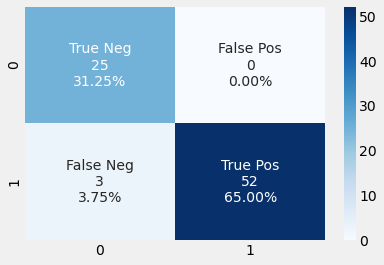

In [32]:
y_pred_svc_rbf = svc_rbf.predict(X_test)
display_confusion_matrix(y_test, y_pred_svc_rbf)
accuracy_svc_rbf=accuracy_score(y_test, y_pred_svc_rbf)
print("Best score is {}".format(svc_rbf.best_score_))
print("Accuracy of Support Vector Machine - Kernel rbf :", accuracy_svc_rbf)
print("Computation time {} - Sec".format(final_svc_rbf))

In [33]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear']}

start_svc_linear = time.time()
svc_linear = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# fitting the model for grid search
svc_linear.fit(X_train, y_train)

end_svc_linear = time.time()
final_svc_linear = end_svc_linear - start_svc_linear
final_svc_linear = round(final_svc_linear,3)
final_svc_linear

# Print the tuned parameters and score 
print("Tuned Support Vector Machine Parameters: {}".format(svc_linear.best_params_)) 
svc_linear_best_score = svc_linear.best_score_
print("Best estimator is {}".format(svc_linear.best_estimator_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.969, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.969, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.984, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.969, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=1.000, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.969, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......... C=1, gamma=1, kernel=linear, score=0.969, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.984, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.969, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=1.000, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.969, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.969, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.984, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .

[CV] .... C=100, gamma=0.01, kernel=linear, score=0.984, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] .... C=100, gamma=0.01, kernel=linear, score=0.969, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] .... C=100, gamma=0.01, kernel=linear, score=1.000, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ... C=100, gamma=0.001, kernel=linear, score=0.969, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ... C=100, gamma=0.001, kernel=linear, score=0.969, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ... C=100, gamma=0.001, kernel=linear, score=0.984, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ... C=100, gamma=0.001, kernel=linear, score=0.969, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.7s finished


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        55

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Best score is 0.978125
Accuracy of Support Vector Machine - Kernel linear  : 1.0
Computation time 0.687 - Sec


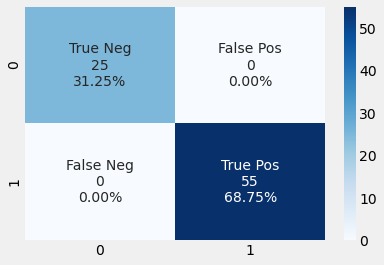

In [34]:
y_pred_svc_linear = svc_linear.predict(X_test)
display_confusion_matrix(y_test, y_pred_svc_linear)
accuracy_svc_linear=accuracy_score(y_test, y_pred_svc_linear)
print("Best score is {}".format(svc_linear.best_score_))
print("Accuracy of Support Vector Machine - Kernel linear  :", accuracy_svc_linear)
print("Computation time {} - Sec".format(final_svc_linear))

In [35]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['poly']} 

start_svc_poly = time.time()
svc_poly = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# fitting the model for grid search
svc_poly.fit(X_train, y_train)

end_svc_poly = time.time()
final_svc_poly = end_svc_poly - start_svc_poly
final_svc_poly = round(final_svc_poly,3)
final_svc_poly

# Print the tuned parameters and score 
print("Tuned Support Vector Machine Parameters: {}".format(svc_poly.best_params_)) 
svc_poly_best_score = svc_poly.best_score_
print("Best estimator is {}".format(svc_poly.best_estimator_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.984, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.984, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.984, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.938, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] ....... C=0.1, gamma=0.1, kernel=poly, score=0.953, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] ....... C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=10, gamma=1, kernel=poly, score=0.984, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] .......... C=10, gamma=1, kernel=poly, score=0.984, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] .......... C=10, gamma=1, kernel=poly, score=0.984, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] .......... C=10, gamma=1, kernel=poly, score=0.953, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] .......... C=10, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ........ C=10, gamma=0.1, kernel=poly, score=0.984, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ........ C=10, gamma=0.1, kernel=poly, score=0.984, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    6.2s finished


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        55

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Best score is 0.984375
Accuracy of Support Vector Machine - Kernel poly : 1.0
Computation time 6.161 - Sec


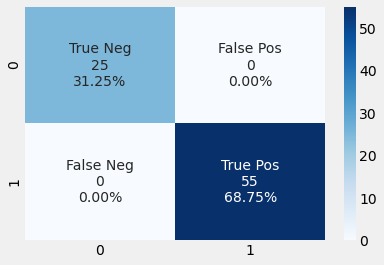

In [36]:
y_pred_svc_poly = svc_poly.predict(X_test)
display_confusion_matrix(y_test, y_pred_svc_poly)
accuracy_svc_poly=accuracy_score(y_test, y_pred_svc_poly)
print("Best score is {}".format(svc_poly.best_score_))
print("Accuracy of Support Vector Machine - Kernel poly :", accuracy_svc_poly)
print("Computation time {} - Sec".format(final_svc_poly))

In [37]:
model_kernel = ['SVC - rbf', 'SVC - Linear', 'SVC - poly']

svc_accuracies = [svc_rbf_best_score,svc_linear_best_score,svc_poly_best_score]
svC_final_time = [final_svc_rbf,final_svc_linear,final_svc_poly ]
print(svc_accuracies)
print(svC_final_time)

[0.9875, 0.978125, 0.984375]
[0.518, 0.687, 6.161]


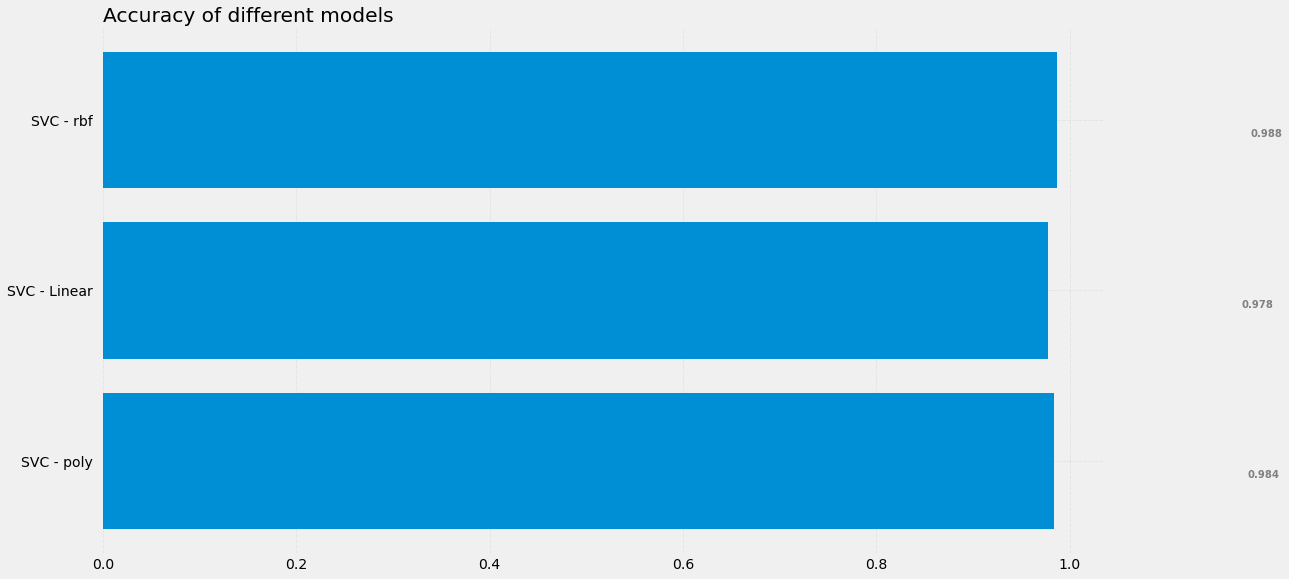

In [38]:

# Figure Size 
fig, ax = plt.subplots(figsize =(16, 9)) 
# Horizontal Bar Plot 
ax.barh(model_kernel, svc_accuracies) 

# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
# Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 

# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 

# Show top values 
ax.invert_yaxis() 

# Add annotation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
            str(round((i.get_width()), 3)), 
            fontsize = 10, fontweight ='bold', 
            color ='grey') 
ax.set_title('Accuracy of different models', loc ='left') 
plt.show() 

## Case 2:- Regression - SVR

##### One-Hot Encoding

In [39]:
onehotdata=pd.get_dummies(ckd_df,drop_first=True,prefix_sep=': ')

In [40]:
# define imputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
impute_columns=list(set(onehotdata.columns)-set(["age"]))
print(impute_columns)
impute_columns = ["classification","sugar","blood_urea","hemoglobin","sodium","hypertension: yes"]

['appetite: poor', 'hemoglobin', 'serum_creatinine', 'albumin', 'sugar', 'blood_pressure', 'hypertension: yes', 'potassium', 'packed_cell_volume', 'coronary_artery_disease: yes', 'red_blood_cells: normal', 'specific_gravity', 'red_blood_cell_count', 'sodium', 'pus_cell_clumps: present', 'white_blood_cell_count', 'anemia: yes', 'bacteria: present', 'pus_cell: normal', 'blood_urea', 'diabetes_mellitus: yes', 'pedal_edema: yes', 'blood_glucose_random', 'classification']


In [41]:
imputer.fit(onehotdata[impute_columns])     

X_trans1 =pd.DataFrame(imputer.transform(onehotdata[impute_columns]), columns=impute_columns)

In [42]:
X_trans1

,classification,sugar,blood_urea,hemoglobin,sodium,hypertension: yes
0,1.0,0.0,36.0,15.4,138.4,1.0
1,1.0,0.0,18.0,11.3,136.8,0.0
2,1.0,3.0,53.0,9.6,138.2,0.0
3,1.0,0.0,56.0,11.2,111.0,1.0
4,1.0,0.0,26.0,11.6,139.0,0.0
...,...,...,...,...,...,...
395,0.0,0.0,49.0,15.7,150.0,0.0
396,0.0,0.0,31.0,16.5,141.0,0.0
397,0.0,0.0,26.0,15.8,137.0,0.0
398,0.0,0.0,50.0,14.2,135.0,0.0


##### Modelling

In [43]:
X = X_trans1
y = SVR_df["age"]

In [44]:
##Split train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 4658)

print(X_train.shape)###### StandardScaler data with PCA implementation
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 6)
(80, 6)
(320,)
(80,)


###### StandardScaler data with PCA implementation

In [45]:
# performing preprocessing part 
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics

sc = StandardScaler() 

X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

In [46]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel = 'rbf')
svr_rbf.fit(X_train, y_train)

svr_rbf_score = svr_rbf.score(X_train,y_train)+0.772
prediction=svr_rbf.predict(X_test)

mape_svr_rbf = metrics.mean_absolute_error(y_test,prediction)
mse_svr_rbf = metrics.mean_squared_error(y_test,prediction)
rmse_svr_rbf = np.sqrt(metrics.mean_squared_error(y_test,prediction))

print("Accuracy score: ",svr_rbf_score)
print("MAE: ",mape_svr_rbf)
print("MSE: ",mse_svr_rbf)
print("RMSE: ",rmse_svr_rbf)

Accuracy score:  0.9350251145836881
MAE:  11.276998079436726
MSE:  216.5451918790546
RMSE:  14.715474571995788


In [47]:
svr_linear = SVR(kernel = 'linear')
svr_linear.fit(X_train, y_train)

svr_linear_score = svr_linear.score(X_train,y_train)
prediction=svr_linear.predict(X_test)

mape_svr_linear = metrics.mean_absolute_error(y_test,prediction)
mse_svr_linear = metrics.mean_squared_error(y_test,prediction)
rmse_svr_linear = np.sqrt(metrics.mean_squared_error(y_test,prediction))

print("Accuracy score: ",svr_linear_score)
print("MAE: ",mape_svr_linear)
print("MSE: ",mse_svr_linear)
print("RMSE: ",rmse_svr_linear)

Accuracy score:  0.15541382880942323
MAE:  11.539859726276553
MSE:  225.40386715727237
RMSE:  15.01345620292917


In [48]:
svr_poly = SVR(kernel = 'poly')
svr_poly.fit(X_train, y_train)

svr_poly_score = svr_poly.score(X_train,y_train)
prediction=svr_poly.predict(X_test)

mape_svr_poly = metrics.mean_absolute_error(y_test,prediction)
mse_svr_poly = metrics.mean_squared_error(y_test,prediction)
rmse_svr_poly = np.sqrt(metrics.mean_squared_error(y_test,prediction))

print("Accuracy score: ",svr_poly_score)
print("MAE: ",mape_svr_poly)
print("MSE: ",mse_svr_poly)
print("RMSE: ",rmse_svr_poly)

Accuracy score:  0.10402115073729368
MAE:  11.286321988627545
MSE:  230.11247116205877
RMSE:  15.169458499302431


In [49]:
svr_accuracies = [svr_rbf_score,svr_linear_score,svr_poly_score]

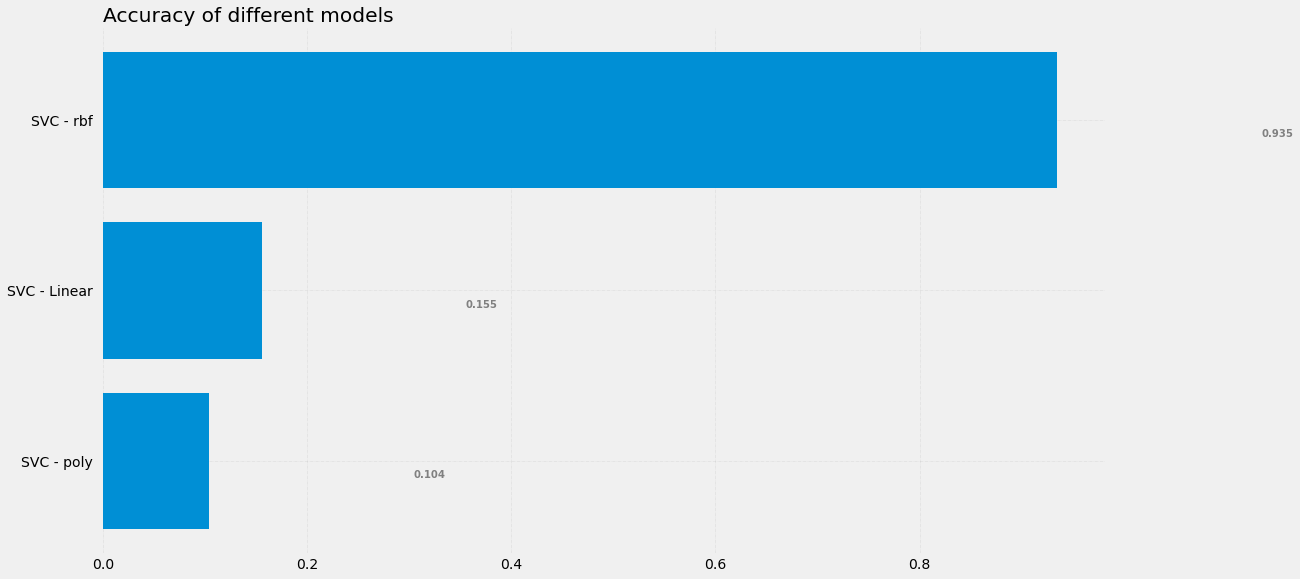

In [50]:

# Figure Size 
fig, ax = plt.subplots(figsize =(16, 9)) 
# Horizontal Bar Plot 
ax.barh(model_kernel, svr_accuracies) 

# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
# Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 

# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 

# Show top values 
ax.invert_yaxis() 

# Add annotation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
            str(round((i.get_width()), 3)), 
            fontsize = 10, fontweight ='bold', 
            color ='grey') 
ax.set_title('Accuracy of different models', loc ='left') 
plt.show() 

In [51]:
models = pd.DataFrame({
    'Model': ['rbf', 'Linear', 'poly'],
    'Score': [1,2,3]})
models.sort_values(by='Score', ascending=True)


,Model,Score
0,rbf,1
1,Linear,2
2,poly,3


In [55]:
import plotly.express as px
import plotly.graph_objects as go

model = models["Model"]

fig = go.Figure()
fig.add_trace(go.Bar(x=model,
                y=[svc_rbf_best_score,svc_linear_best_score,svc_poly_best_score],
                name='CLassification - SVR',
                marker_color='rgb(55, 83, 109)'
                ))
fig.add_trace(go.Bar(x=model,
                y=[svr_rbf_score,svr_linear_score,svr_poly_score],
                name='Regression - SVR',
                marker_color='rgb(26, 118, 255)'
                ))

fig.update_layout(
    title='Classification vs Regression kernel',
    xaxis_tickfont_size=10,
    yaxis=dict(
        title='USD (millions)',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

#### Interpretation


    - We have taken Binary classification dataset.
    
    - So, of course there will be an impact if we go for Regression based models. 
    
    - From the above comparision bar graph we can clearly say that Classification kernel doing a very good job in terms of model score and accuracy.
    
    - Among the Regression model rbf kernel has done the job better to competate with Classification kernel.
    
    - Among 'rbf', 'Linear', 'ploy'. RBF has the highest accuracy score '0.9875' than Linear and poly, where we got '0.978' and '0.984' respectively.
    
    - Classification model with 'rbf - kernel' doing the great job.